In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

In [2]:
#Importing train, eval, and the test sets

train=pd.read_parquet('https://huggingface.co/datasets/myvision/gender-classification/resolve/main/data/train-00000-of-00001.parquet')
eval_=pd.read_parquet('https://huggingface.co/datasets/myvision/gender-classification/resolve/main/data/eval-00000-of-00001.parquet')
test=pd.read_parquet('https://huggingface.co/datasets/myvision/gender-classification/resolve/main/data/test-00000-of-00001.parquet')

In [3]:
# Looking at the first 5 rows

train.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


In [4]:
# Looking at the data types and the shape of the data

print(train.dtypes)
print("==================")
print(f"Shape of the data is: {train.shape}")

image    object
label     int64
dtype: object
Shape of the data is: (5000, 2)


In [5]:
train.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


In [6]:
train_females=train[train['label']==0]
train_males=train[train['label']==1]

eval_females=eval_[eval_['label']==0]
eval_males=eval_[eval_['label']==1]

test_females=test[test['label']==0]
test_males=test[test['label']==1]

In [7]:
# Function for converting the bytes data to numpy arrays

def convert_bytes(data):
    image2=[]
    for item in data['image']:
        image2.append(list(item.values()))

    ls=[]
    for item in range(0,len(image2)):
        ls.append(image2[item][0])

    del image2

    data['image2']=ls

    del ls

    image3=[]
    for item in range(0,len(data)):
        image3.append(np.array(Image.open(io.BytesIO((data['image2'].iloc[item])))))

    data['image3']=image3
    del image3

    data.drop(['image','image2'], axis=1, inplace=True)
    data.rename(columns={'image3':'image'}, inplace=True)

    return data

In [8]:
#Converting the byte data to arrays for all 3 datasets and 2 classes

train_females_converted=convert_bytes(train_females)
train_males_converted=convert_bytes(train_males)
eval_females_converted=convert_bytes(eval_females)
eval_males_converted=convert_bytes(eval_males)
test_females_converted=convert_bytes(test_females)
test_males_converted=convert_bytes(test_males)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [9]:
#Looking at the first five columns of the converted test data
test_females_converted.head()

,label,image
0,0,"[[[206, 206, 142], [206, 206, 142], [208, 210,..."
1,0,"[[[36, 37, 39], [32, 33, 35], [33, 34, 36], [3..."
2,0,"[[[209, 205, 193], [209, 205, 193], [208, 204,..."
3,0,"[[[212, 224, 214], [221, 231, 222], [230, 237,..."
4,0,"[[[146, 50, 52], [146, 54, 55], [143, 53, 52],..."


In [ ]:
#Saving the train_males photos to local
for item in range(0,len(train_males_converted)):
  img = Image.fromarray(train_males_converted.image.iloc[item], 'RGB')
  try:
    img.save(f'/content/train_males/photo_{item}_train_males.png')
    print("=====================FILE SAVED==================")
  except:
    print("=================COULDN'T BE SAVED===============")
    continue

In [ ]:
#Saving the train_females photos to local

for item in range(0,len(train_females_converted)):
  img = Image.fromarray(train_females_converted.image.iloc[item], 'RGB')
  try:
    img.save(f'/content/train_females/photo_{item}_train_females.png')
    print("=====================FILE SAVED==================")
  except:
    print("=================COULDN'T BE SAVED===============")
    continue

In [ ]:
#Saving the eval_males photos to local

for item in range(0,len(eval_males_converted)):
  img = Image.fromarray(eval_males_converted.image.iloc[item], 'RGB')
  try:
    img.save(f'/content/eval_males/photo_{item}_eval_males.png')
  except:
    continue

In [ ]:
#Saving the eval_females photos to local

for item in range(0,len(eval_females_converted)):
  img = Image.fromarray(eval_females_converted.image.iloc[item], 'RGB')
  try:
    img.save(f'/content/eval_females/photo_{item}_eval_females.png')
  except:
    continue

In [ ]:
#Saving the test_males photos to local

for item in range(0,len(test_males_converted)):
  img = Image.fromarray(test_males_converted.image.iloc[item], 'RGB')
  try:
    img.save(f'/content/test_males/photo_{item}_test_males.png')
  except:
    continue

In [ ]:
#Saving the test_females photos to local

for item in range(0,len(test_females_converted)):
  img = Image.fromarray(test_females_converted.image.iloc[item], 'RGB')
  try:
    img.save(f'/content/test_females/photo_{item}_test_females.png')
  except:
    continue

In [18]:
#Keras Image Generator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
#Creating the file paths variables

base_dir = '/content/'
train_dir = os.path.join(base_dir, 'train_dir')
eval_dir = os.path.join(base_dir, 'eval_dir')
test_dir = os.path.join(base_dir, 'test_dir')

In [25]:
#Creating the train generator

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 5000 images belonging to 2 classes.


In [29]:
#Creating the validation generator

eval_generator = test_datagen.flow_from_directory(
eval_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [30]:
#Looking at the data and batch shapes

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)  
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
#Building the architecture

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=1e-4),
metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [34]:
#Training the model

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=eval_generator,
validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 100s 984ms/step - loss: 0.6017 - acc: 0.6825 - val_loss: 0.4444 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 98s 976ms/step - loss: 0.4540 - acc: 0.7955 - val_loss: 0.3699 - val_acc: 0.8480
Epoch 3/30
100/100 [==============================] - 97s 973ms/step - loss: 0.3702 - acc: 0.8455 - val_loss: 0.3514 - val_acc: 0.8410
Epoch 4/30
100/100 [==============================] - 98s 976ms/step - loss: 0.3353 - acc: 0.8505 - val_loss: 0.3017 - val_acc: 0.8670
Epoch 5/30
100/100 [==============================] - 99s 988ms/step - loss: 0.3109 - acc: 0.8665 - val_loss: 0.2524 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 98s 981ms/step - loss: 0.2780 - acc: 0.8850 - val_loss: 0.2474 - val_acc: 0.9030
Epoch 7/30
100/100 [==============================] - 98s 979ms/step - loss: 0.2393 - acc: 0.9085 - val_loss: 0.2340 - val_acc: 0.9060
Epoch 8/30
100/100 [==============================] - 

In [35]:
#Saving the model

model.save('gender_classifier_v1.h5')

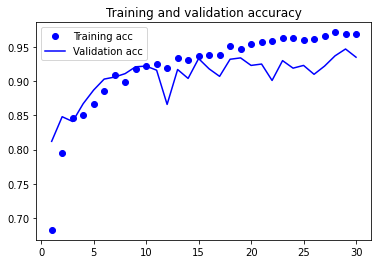

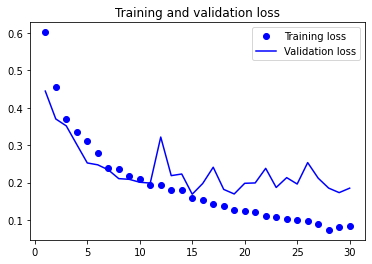

In [36]:
# Plotting the history of training in terms of train acc, validation acc, train loss, and validation loss

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

It looks like there is no overfitting. So, we are going to use this model for final testing.

In [64]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test acc: 0.9169999957084656
test loss: 0.20935499668121338


91% accuracy is a good accuracy for this model, indicating this is a powerful model in classifying the genders.

In [47]:
#Function for loading a new image

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    display(img)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
# Loading a single image for prediction
new_image = load_image('img_1.JPG')

# Checking the prediction
pred = model.predict(new_image)
if pred[0][0]>=0.5:
  print('Male')
else:
  print('Female')